<a href="https://colab.research.google.com/github/Shourya306/Supervised-Machine-Learning---Regression-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [32]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')  # Code to not show me any warnings that might arise.

pd.set_option('max_columns', None) # Code to make sure pandas shows me all the columns.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
# Reading in the dataset.
# Encoded with "latin-1" because the default encoding wasn't able to encode the large file. 
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bike Sharing Demand Prediction - Challa Shourya Chandra Sai./Copy of SeoulBikeData.csv',encoding ='latin')

In [34]:
# Viewing the first 5 rows.
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [35]:
# Viewing the last 5 rows.
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [36]:
# Understading the datatype of the columns.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [37]:
# Understanding basic stats.
dataset.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


## **Defining The Problem Statement**

*Understanding the difference between continous variables and discrite variables.*

**Continous variables** - These are those variables whose values are obtained by measuring. They can assume any value between an interval.

**Descrite variables** - These are those variables whose values are obtained by counting. They can assume distinct set of values.

*Why Choose Linear Regression to model the data?*

Linear Regression is used to model the data because we want to predict the **dependent variable(y)** which is continous in nature.

*Segregating the variables into **dependent & independent** variables[categorical or numeric continous/discrete].*

Dependent variable(Y): **Rented Bike Count**

Independent variable(X):

  * Date = Breaking the column into 3 seperate columns - Date, Month, Year.

  * Hour = Numeric Descrite Variable.

  * Temperature(°C) = Continous Variable.

  * Humidity(%) = Continous Variable.

  * Wind speed (m/s) = Continous Variable.

  * Visibility(10m) = Continous Variable.

  * Dew point temperature(°C) = Continous Variable.

  * Solar Radiation (MJ/m2) = Continous Variable.

  * Rainfall(mm) = Continous Variable.

  * Snowfall(cm) = Continous Variable.

  * Seasons = Categorical Variable of 4 classes.

  * Holiday = Categorical Variable of 2 classes.

  * Functioning Day = Categorical Variable of 2 classes.


## Data Preprocessing

Checking if there are any duplicate values in the dataset.

In [38]:
dataset[dataset.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


**We can see that there aren't any duplicate values in the dataset. It is essential to remove dublicate values in the dataset for our model to generalize the unseen data.**

Checking for null values.

In [39]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**Thank god! there aren't any null values.**

Working on the date column.

In [45]:
# A simple function to extract the date of the month from the date column
def date_new(date):
  return date[:2]

In [46]:
# Applying the above written function to the date column.
dataset['new_date'] = dataset['Date'].apply(date_new)

In [48]:
# Converting the Date column dtype to datetime so that we can extract the month and the year from the date column.
dataset['Date'] = dataset['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [49]:
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month

In [50]:
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,new_date,year,month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,2017,12


In [53]:
dataset['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

In [20]:
dataset['month'].value_counts()

12    744
1     744
3     744
5     744
7     744
8     744
10    744
4     720
6     720
9     720
11    720
2     672
Name: month, dtype: int64

In [52]:
dataset['new_date'].value_counts()

01    288
02    288
28    288
27    288
26    288
25    288
24    288
23    288
22    288
21    288
20    288
19    288
18    288
17    288
16    288
15    288
14    288
13    288
12    288
11    288
10    288
09    288
08    288
07    288
06    288
05    288
04    288
03    288
29    264
30    264
31    168
Name: new_date, dtype: int64

I will be dropping the date column from the dataset since we have extracted all the required information from it.

In [54]:
# Dropping the date column.
dataset.drop('Date', axis = 1, inplace = True)

In [55]:
# Renaming the new_date to date.
dataset.rename(columns = {'new_date':'date'}, inplace = True)

In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  date                       8760 non-null   int64

In [60]:
# Converting the date column datatype to integer from object.
dataset['date'] = dataset['date'].astype('int64')

## Exploratory Data Analysis

Exploratory Data Analysis is performed to understand the relationship between independent variables and dependent variable.



### EDA on Numeric Data

**Hypothesis** - Summer Months viz. March, April, May, June will see a rise in the usage of bikes because teenagers might use it during their summer breaks.

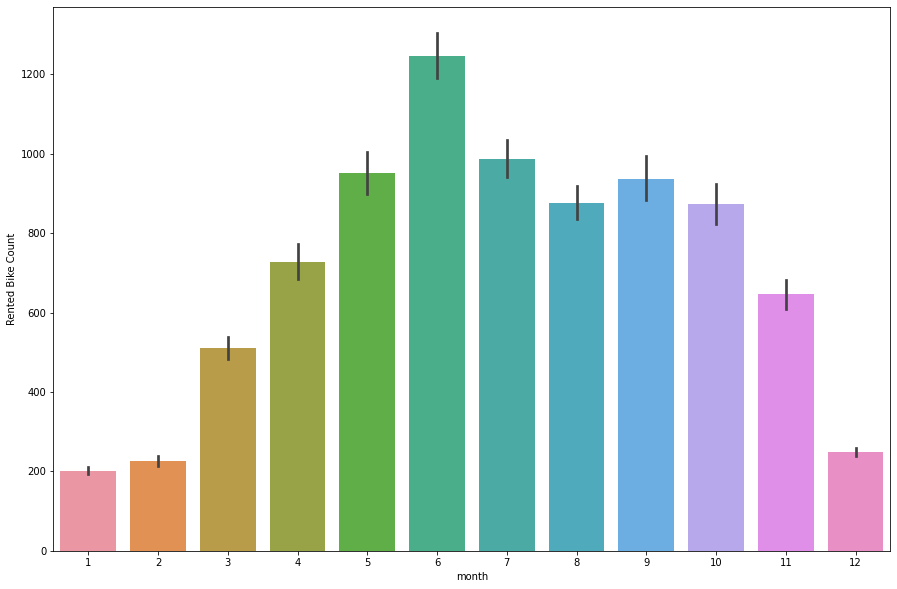

In [75]:
# Plotting a barplot on month vs rented bike
plt.figure(figsize = (15,10))
sns.barplot(x = dataset['month'], y = dataset['Rented Bike Count'], data = dataset)

**Analysis** - My hypothesis was right, Usage of bikes are high on March, April, May, and June.

**Hypothesis** - Mornings and Evenings we might see the usage of bike augment. The working population might be using these to commute to work.

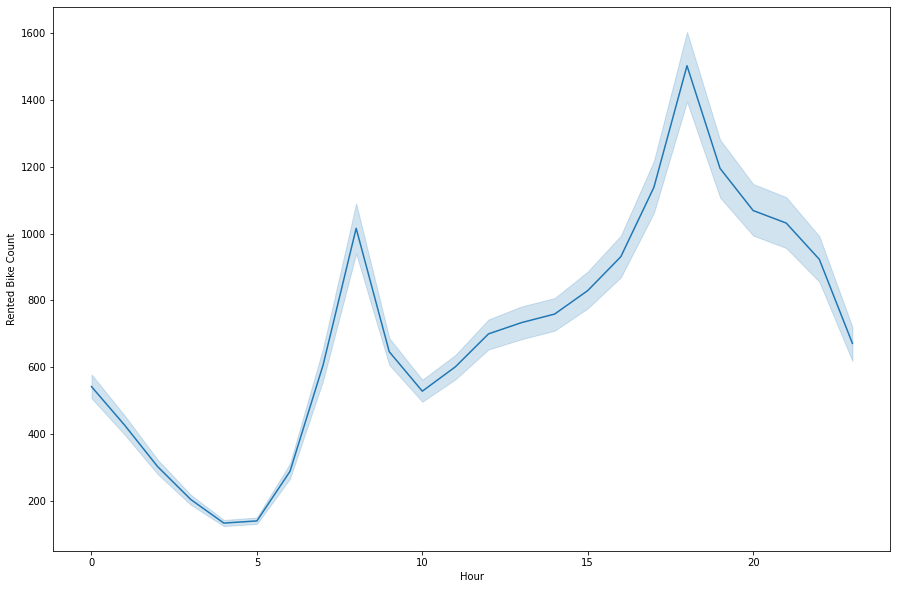

In [77]:
# Plotting a line plot on hour vs rented bike count
plt.figure(figsize = (15,10))
sns.lineplot(x = dataset['Hour'], y = dataset['Rented Bike Count'], data = dataset)

**Analysis** - My hypothesis is right, we can see the usage of bikes is more the mornings and evenings.

**Hypothesis** - The use of bikes will be low when the snowfall is high. 

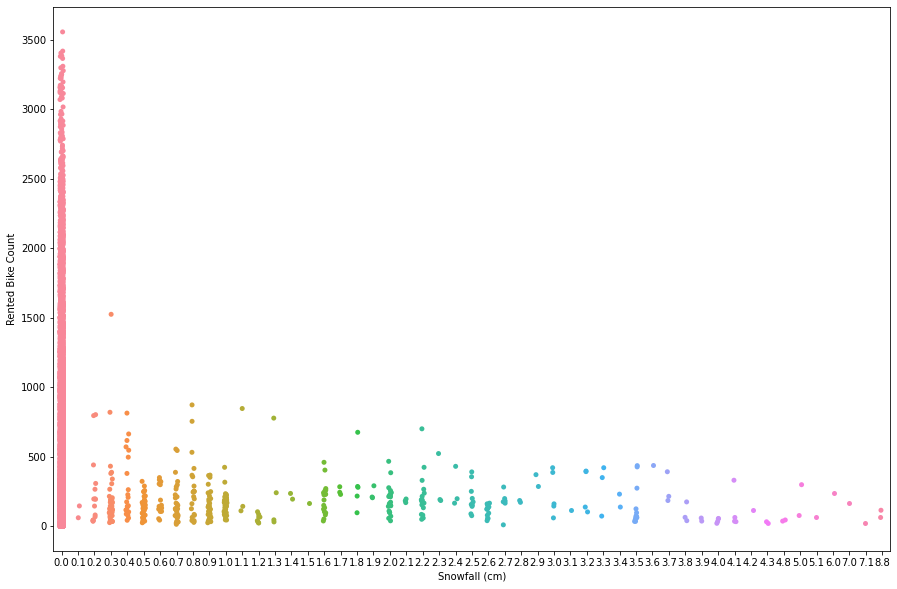

In [83]:
# Plotting a stripplot on snowfall vs rented bike plot
plt.figure(figsize = (15,10))
sns.stripplot(x = dataset['Snowfall (cm)'], y = dataset['Rented Bike Count'], data = dataset)

**Analysis** - Yayy!! my hypothesis was indeed ture.

### EDA on Categorical Data

**Hypothesis** - Usage of bikes during summer will be more when compared to other months.

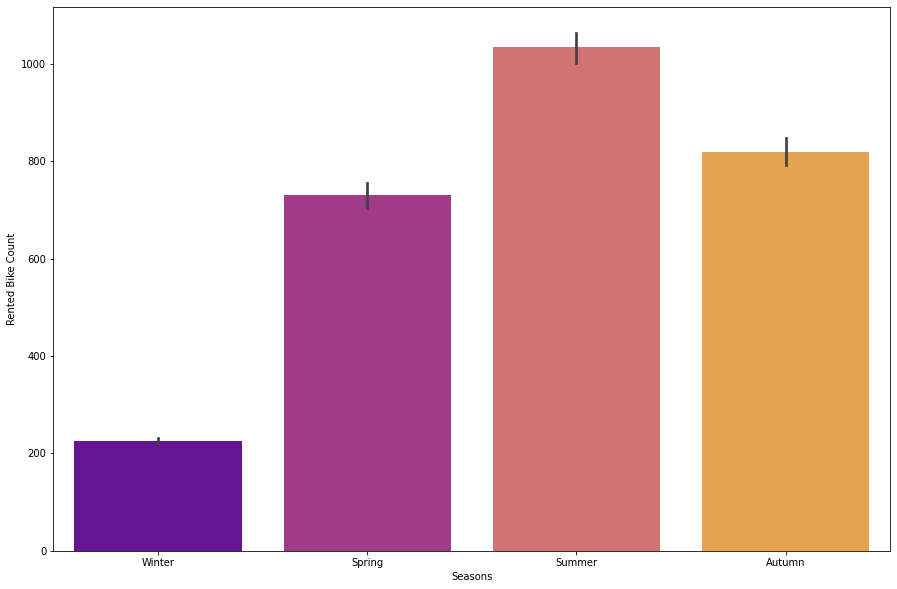

In [93]:
# Plotting a barplot on Seasons vs Rented Bike
plt.figure(figsize=(15,10))
sns.barplot(x = dataset['Seasons'], y = dataset['Rented Bike Count'], data = dataset, palette ='plasma')

**Analysis** - My Hypothesis is correct.

**Hypothesis** - Usage of bikes might be more during the working days as the population might use these bikes for commuting to work.

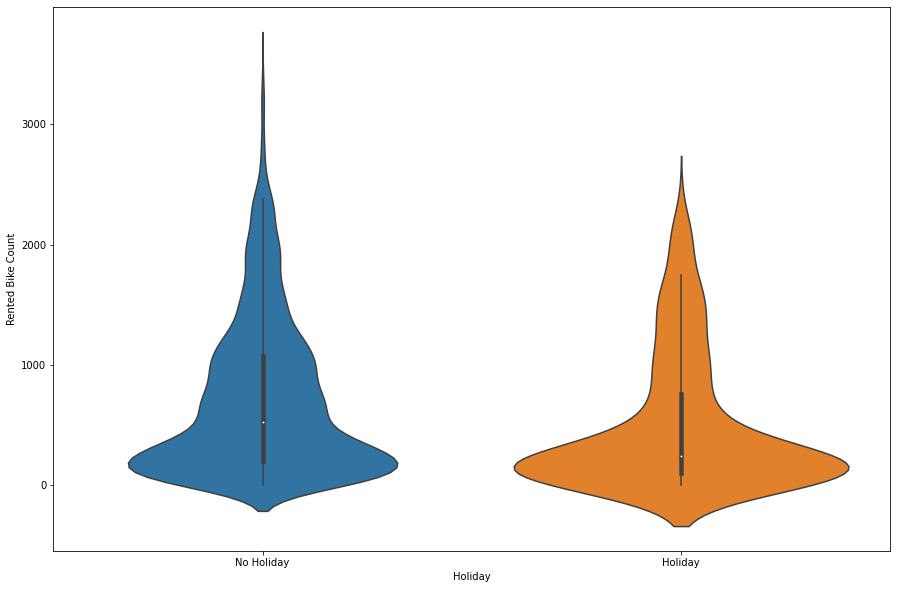

In [96]:
# Plotting a voilin plot on Holiday vs Rented Bike.
plt.figure(figsize = (15,10))
sns.violinplot(x = dataset['Holiday'], y = dataset['Rented Bike Count'], data = dataset)

**Analysis** - My Hypothesis is correct.